# Tarea Semana 3-4 — CNN + Data Augmentation
**Equipo:** Alan De Loa, Leonardo Lopez, Isaac Zaragoza, Luis Diaz, Luis Guzman  
**Fecha:**  20-10-2025

**Objetivo:** En esta tarea se busca construir y evaluar un modelo de Deep Learning creando una Red Neuronal Convulacional aplicando tecnicas de Data Augmentation, las cuales nos permiten crear multiples escenarios para el entrenamiento del modelo, obteniendo mejores resultados 

## 1) Introducción (5%)

En este notebook modelamos un problema de clasificación  multiclase utilizando el dataset Fashion MNIST. Este dataset se obtuvo de la libreria de keras, y muestra diferentes imagenes de prendas de ropa, como camisas, vestidos, calzado y accesorios. Estos están representados mediante números en los valores de salida, siendo los siguientes:  

0 -> Playeras / top  
1 -> Pantalón   
2 -> Sueter  
3 -> Vestidos  
4 -> Abrigo  
5 -> Sandalias  
6 -> Camisa   
7 -> Tenis  
8 -> Bolsa  
9 -> Bota  


## 2) Exploración, explicación y limpieza de datos (20%)

**Fuente y contexto del dataset:**  
El dataset utilizado proviene de la libreria `keras`. Este conjunto de datos es el **Fashion-Mnist**, el cual nos permite acceder a imagenes de distintas prendas de ropa  
- La tarea es clasificar la imagen de acuerdo a la prenda correspondiente  
- Se cuentan con 60 mil imagenes de entrenamiento  
- Se cuentan con 10 mil imagenes de prueba  


##  Importacion de librerias


In [19]:
import tensorflow as tf # Importamos la biblioteca TensorFlow
from tensorflow import keras # Importamos Keras desde TensorFlow
import matplotlib.pyplot as plt # Importamos Matplotlib para visualización
import numpy as np # Importamos NumPy para operaciones numéricas

SEED = 42 # Definimos una semilla para reproducibilidad
np.random.seed(SEED) 
tf.random.set_seed(SEED) # Establecemos la semilla en TensorFlow

## Carga del dataset  en variables de entrenamiento y variables de prueba

In [20]:
(num_classes, img_h, img_w, ch) = (10, 28, 28, 1) # Definimos parámetros del conjunto de datos como número de clases, altura, ancho y canales de las imágenes
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data() # Cargamos el conjunto de datos Fashion MNIST en variables de entrenamiento y prueba


## Longitud del dataset

In [21]:
print(len(x_train), len(y_train)) # Imprimimos la cantidad de muestras en los conjuntos de entrenamiento
print(len(x_test), len(y_test)) # Imprimimos la cantidad de muestras en los conjuntos de prueba

60000 60000
10000 10000


## Imagenes de entrada

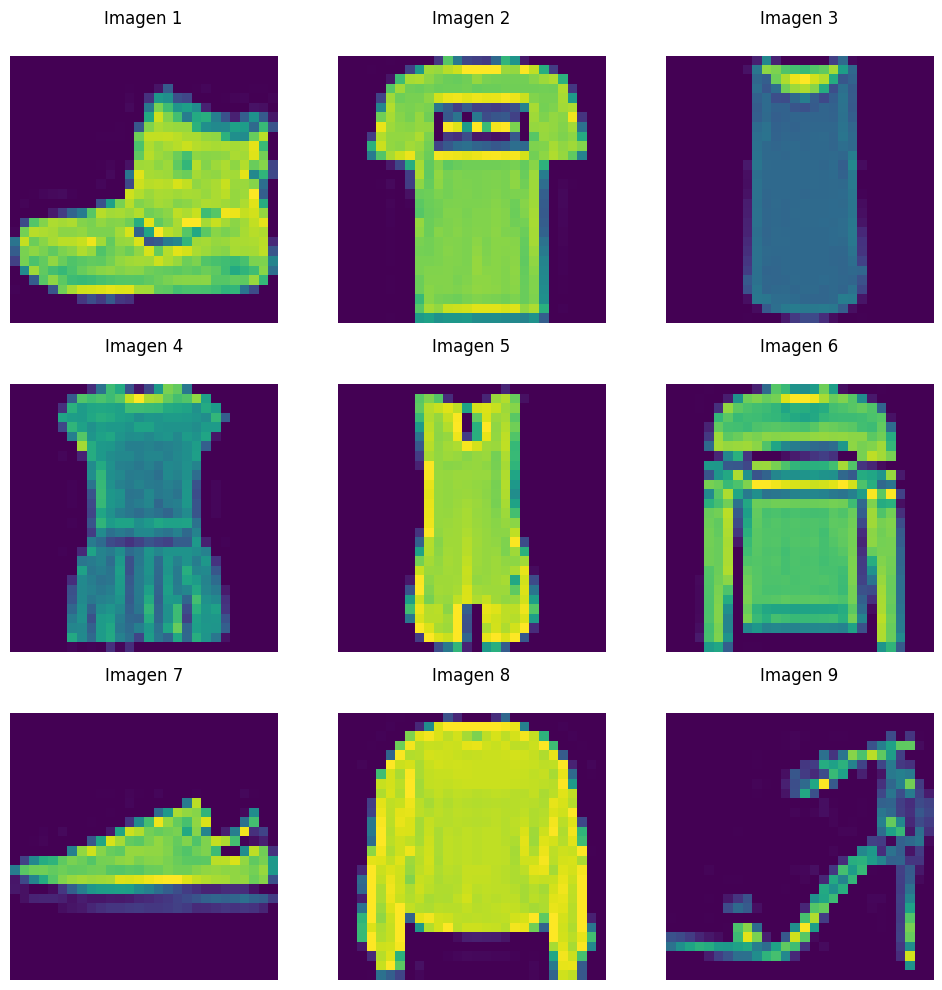

In [22]:
# Creamos una figura que nos permita visualizar las primeras imágenes del conjunto de entrenamiento
fig, axes = plt.subplots(3, 3, figsize=(10, 10)) # Creamos una cuadrícula de 3x3 para mostrar las imágenes

# Aplanamos los ejes para poder iterar fácilmente
axes = axes.flatten()

# Mostrar las 9 primeras imágenes
for i in range(9):
    axes[i].matshow(x_train[i])
    axes[i].set_title(f"Imagen {i+1}") # Título para cada imagen
    axes[i].axis("off")  # Quitamos los ejes para obtener una mejor visualización



plt.tight_layout() # Ajustamos el diseño para evitar solapamientos
plt.show() # Mostramos la figura con las imágenes

## 3) Desarrollo del Modelo de Deep Learning (25%)

### Añadimos canal de color a la forma del dataset

In [23]:
x_train = x_train[..., None].astype("float32") # Agregamos una dimensión adicional a las imagenes para el canal del color
x_test  = x_test[..., None].astype("float32") # Agregamos una dimensión adicional a las imagenes para el canal del color

### Data Augmentation

In [24]:

data_augmentation = keras.Sequential([ #Creamos una secuencia para la configuración de nuestro data augmentation
    keras.layers.RandomFlip("horizontal"), # Aplicamos un volteo horizontal aleatorio
    keras.layers.RandomRotation(0.05), # Aplicamos una rotación aleatoria de hasta 5 grados
    keras.layers.RandomZoom(0.05), # Aplicamos un zoom aleatorio de hasta 5%
]) # Definimos el nombre de la secuencia como "augmentation"


### Normalización de escala de colores

In [25]:
rescale = keras.layers.Rescaling(1./255) # Normalizamos los valores de los píxeles a un rango de 0 a 1 

### Aplicar data augmentation y escalamiento

In [26]:
inputs = keras.Input(shape=(img_h, img_w, ch)) # Definimos la entrada del modelo con la forma adecuada con las variables definidas anteriormente
x = data_augmentation(inputs) # Aplicamos las transformaciones de data augmentation a las entradas
x = rescale(x) # Normalizamos las entradas

### Bloques convolucionales

In [27]:
# Bloque conv 1
x = keras.layers.Conv2D(32, 3, padding="same", activation="relu", kernel_initializer="he_normal")(x) # Primera capa convolucional con 32 filtros, tamaño 3x3, padding "same" y activación ReLU
x = keras.layers.BatchNormalization()(x) # Normalización por lotes para estabilizar y acelerar el entrenamiento
x = keras.layers.MaxPooling2D()(x) # Capa de pooling para reducir la dimensionalidad espacial

# Bloque conv 2
x = keras.layers.Conv2D(64, 3, padding="same", activation="relu", kernel_initializer="he_normal")(x) # Segunda capa convolucional con 64 filtros, tamaño 3x3, padding "same" y activación ReLU
x = keras.layers.BatchNormalization()(x) # Normalización por lotes
x = keras.layers.MaxPooling2D()(x) # Capa de pooling
x = keras.layers.Dropout(0.25)(x) # Capa de dropout para reducir el sobreajuste

# Bloque conv 3
x = keras.layers.Conv2D(128, 3, padding="same", activation="relu", kernel_initializer="he_normal")(x) # Tercera capa convolucional con 128 filtros, tamaño 3x3, padding "same" y activación ReLU
x = keras.layers.BatchNormalization()(x)    # Normalización por lotes
x = keras.layers.MaxPooling2D()(x) # Capa de pooling
x = keras.layers.Dropout(0.25)(x)

### Aplanamiento de imagenes

In [28]:
x = keras.layers.Flatten()(x) # Aplanamos las imagenes 

### Clasificador de imagenes

In [29]:
x = keras.layers.Dense(128, activation="relu", kernel_initializer="he_normal")(x) # Capa densa con 128 unidades y activación ReLU
x = keras.layers.Dropout(0.5)(x) # Capa de dropout para reducir el sobreajuste
outputs = keras.layers.Dense(num_classes, activation="softmax",kernel_initializer="glorot_uniform")(x) # Capa de salida con activación softmax para clasificación multiclase

### Crear el modelo

In [30]:
model = keras.Model(inputs, outputs) # Creamos el modelo de Keras especificando las entradas y salidas

### Compilación del modelo

In [31]:
model.compile( # Compilamos el modelo con el optimizador Adam, la función de pérdida de entropía cruzada y la métrica de precisión
    optimizer=keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


### Callbacks para monitoreo de aprendizaje

In [32]:
callbacks = [ # Definimos las callbacks para el entrenamiento del modelo
    keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True), # Detenemos el entrenamiento si no hay mejora en 5 épocas y restauramos los mejores pesos
    keras.callbacks.ReduceLROnPlateau(patience=3) # Reducimos la tasa de aprendizaje si no hay mejora en 3 épocas
]


## RESULTADOS Y EVALUACIÓN DEL MODELO

### Entrenamiento 

In [37]:
history = model.fit( # Entrenamos el modelo con los datos de entrenamiento, un conjunto de validación, número de épocas, tamaño de lote y las callbacks definidas
    x_train, y_train,
    validation_split=0.1, # Usamos el 10% de los datos de entrenamiento para validación
    epochs=30, # Número de épocas para entrenar
    batch_size=128, # Tamaño del lote
    callbacks=callbacks, # Usamos las callbacks definidas anteriormente
    verbose=1 # Mostramos el progreso del entrenamiento
)


Epoch 1/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 34s 81ms/step - accuracy: 0.9019 - loss: 0.2735 - val_accuracy: 0.9122 - val_loss: 0.2321 - learning_rate: 1.0000e-04
Epoch 2/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 36s 84ms/step - accuracy: 0.9011 - loss: 0.2723 - val_accuracy: 0.9118 - val_loss: 0.2341 - learning_rate: 1.0000e-04
Epoch 3/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 35s 84ms/step - accuracy: 0.9013 - loss: 0.2698 - val_accuracy: 0.9143 - val_loss: 0.2341 - learning_rate: 1.0000e-04
Epoch 4/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 35s 84ms/step - accuracy: 0.9033 - loss: 0.2685 - val_accuracy: 0.9158 - val_loss: 0.2310 - learning_rate: 1.0000e-05
Epoch 5/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 37s 88ms/step - accuracy: 0.9035 - loss: 0.2694 - val_accuracy: 0.9153 - val_loss: 0.2307 - learning_rate: 1.0000e-05


### Evaluacion

In [38]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1) # Evaluamos el modelo en el conjunto de prueba
print(f"Test acc: {test_acc:.3f}") # Imprimimos la precisión del modelo en el conjunto de prueba


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9074 - loss: 0.2522
Test acc: 0.907


## Comparación de imagenes predichas y imagenes reales

In [47]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print("Predicciones:", y_pred_classes[:10])
print("Reales:", y_test[:10])



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Predicciones: [9 2 1 1 6 1 4 6 5 7]
Reales: [9 2 1 1 6 1 4 6 5 7]


## JUSTIFICACIÓN

### 1️⃣ Función de costo  
- **sparse_categorical_crossentropy** fue utilizada ya que el problema es de **clasificación multiclase**.  
  Esta función mide el grado de error entre las clases predichas por el modelo y las clases reales, ajustando los pesos internos de la red para reducir estos errores. Logrando aprender de las propias equivocaciones, evitando reasginar una clasificación con baja probabilidad.      

### 2️⃣ Inicialización de pesos  
- Se usó **He Normal Initialization** para las capas con activación **ReLU** , esto ya que la activación He Normal nos permite una distribución balanceada de la información evitando que los gradientes exploten o aprendan con lentitud.  
- La capa de salida usa **Glorot Uniform** con la función de activación **Softmax**, ya que esta nos asegura una distribución equilibrada en los pesos de la capa final , para que softmax pueda asignar probabilidades bien calibradas.  

### 3️⃣ Función de activación  
- **ReLU**: La función ReLu nos permite mantener los valores positivos y convertir los valores negativos a 0, logrando la no linealidad
- **Softmax** La función softmax nos permite asignar probabilidades a los valores de salida, lo que nos ayuda en la interpretación y permite asignar a cada imagen a la clase con mayor probabilidad 

### 4️⃣ Regularización
Se aplicó la técnica de **Dropout** : esta 'apaga' neuronas de manera aleatoria obligando al modelo a aprender de una forma general, evitando el overfitting


### 5️⃣ Control de tasa de aprendizaje
- Utilizamos 2 funciones para el monitoreo de la tasa de aprendizaje:
-**EarlyStopping** : la cuál nos permite tener el entrenamiento de manera automatica cuando el modelo deja de mejorar, evitando el overfitting, de igual manera al detenerse el entrenamiento, se recuperan los pesos del mejor puntaje obtenido.
-**ReduceLROnPlateu** : Esta función nos permite reducir la tasa de aprendizaje de manera automatica cuando el modelo deja de mejorar de gran manera, permitiendonos enfocar en zonas más precisas , mejorando la precisión.

### 6️⃣ Normalización de entradas
- Normalizamos los valores de los píxeles de la imagen dividiéndolos entre el valor máximo posible (255) para llevarlos al rango, obteniendo valores entre 0 y 1

### 7️⃣ Métricas de evaluación
- **Accuracy**: Utilizamos esta metrica ya que nos permite conocer el total de predicciones correctas sobre el total de las predicciones, brindandonos una observación del comportamiento general del modelo
 

### 8️⃣ Estrategias contra la divergencia
- Como medidas contra la divergencia aplicamos funciones como el **escalamiento de datos** , **Drop out** y los call backs **EarlyStopping** y **ReduceLROnPlateu**, estos nos permitieron mantener la estabilidad del entrenamiento , teniendo un control sobre la tasa de aprendizaje y reducir el sobreajuste.

##  INTERPRETACIÓN DE RESULTADOS Y CONCLUSIÓN

### Interpretación de resultados  

El modelo CNN entrenado para la clasificación de imágenes del conjunto Fashion-MNIST, complementado con técnicas de Data Augmentation, mostró un buen desempeño al alcanzar una precisión del 90.7 % en los datos de prueba, lo que indica que es capaz de  identificar correctamente aproximadamente nueve de cada diez prendas.    

La pequeña diferencia entre la precisión de entrenamiento y validación muestra que el modelo no memorizó el orden de los datos sino que aprendió patrones útiles para la clasificación de las imágenes.  

### Conclusiones  

El modelo demostró un rendimiento estable y eficiente, confirmando que el uso conjunto de Data Augmentation, normalización de datos y control adaptativo de la tasa de aprendizaje favorece una convergencia más rápida y precisa.  

Estas estrategias permitieron mejorar la generalización del modelo sin requerir una gran capacidad computacional, alcanzando un alto porcentaje de aciertos en la clasificación de las prendas. En conjunto, el sistema propuesto representa una solución robusta, optimizada y escalable para tareas de clasificación multiclase.  
